<a href="https://colab.research.google.com/github/HatemGamal/ElectroPi/blob/main/AirbnbDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd

In [68]:
df = pd.read_csv('AirbnbTexas.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14694 non-null  int64  
 1   name                            14694 non-null  object 
 2   host_id                         14694 non-null  int64  
 3   host_name                       14692 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   14694 non-null  int64  
 6   latitude                        14694 non-null  float64
 7   longitude                       14694 non-null  float64
 8   room_type                       14694 non-null  object 
 9   price                           14694 non-null  int64  
 10  minimum_nights                  14694 non-null  int64  
 11  number_of_reviews               14694 non-null  int64  
 12  last_review                     

In [43]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,107,2,648,2023-06-04,3.73,1,341,45,NaN
1,324480,Rental unit in Austin · 1 bedroom · 1 bed · 1 ...,1660476,Mark,NaN,78705,30.29905,-97.73881,Entire home/apt,99,30,1,2022-09-20,0.11,2,363,1,NaN


In [133]:
df['name_type']=df['name'].str.split(" · ").str[0]

In [ ]:
df['rate']=df['name'].str.split(" · ").str[0]

In [144]:
df['rate']=df[df['name'].str.contains('★')== True]['name'].str.split(" · ").str[1]

## **Cleaning Data**

Removing unnecessary columns

In [44]:
df.drop(['neighbourhood_group','license','id','host_id'], axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14694 entries, 0 to 14693
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_name                       14692 non-null  object 
 1   neighbourhood                   14694 non-null  int64  
 2   latitude                        14694 non-null  float64
 3   longitude                       14694 non-null  float64
 4   room_type                       14694 non-null  object 
 5   price                           14694 non-null  int64  
 6   minimum_nights                  14694 non-null  int64  
 7   number_of_reviews               14694 non-null  int64  
 8   last_review                     11727 non-null  object 
 9   reviews_per_month               11727 non-null  float64
 10  calculated_host_listings_count  14694 non-null  int64  
 11  availability_365                14694 non-null  int64  
 12  number_of_reviews_ltm           

In [46]:
df['room_type'].value_counts()

Entire home/apt    12127
Private room        2443
Shared room          116
Hotel room             8
Name: room_type, dtype: int64

In [59]:
df['last_review'].value_counts()

2023-06-04    656
2023-05-29    610
2023-05-21    407
2023-05-28    340
2023-05-07    328
             ... 
2018-05-07      1
2016-09-17      1
2020-02-18      1
2019-02-17      1
2023-02-14      1
Name: last_review, Length: 1412, dtype: int64

In [60]:
df['number_of_reviews_ltm'].describe()

count    14694.000000
mean        10.733565
std         17.337812
min          0.000000
25%          0.000000
50%          3.000000
75%         15.000000
max        280.000000
Name: number_of_reviews_ltm, dtype: float64

In [67]:
df[df['price']>10000]

,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5038,Above Vacation,78733,30.33617,-97.847720,Entire home/apt,10450,1,0,NaN,NaN,48,230,0
8456,Suiteness,78701,30.26026,-97.738838,Private room,20000,1,0,NaN,NaN,14,119,0
9144,Evolve,78747,30.12428,-97.776670,Entire home/apt,10309,30,0,NaN,NaN,50,364,0
12498,Suiteness,78701,30.26026,-97.738840,Private room,20000,1,0,NaN,NaN,14,119,0
12506,Suiteness,78701,30.26026,-97.738840,Private room,20000,1,0,NaN,NaN,14,119,0
12509,Suiteness,78701,30.26026,-97.738840,Private room,20000,1,0,NaN,NaN,14,117,0


In [ ]:
df.groupby(['room_type'])['price','minimum_nights','number_of_reviews'].describe().T

In [66]:
pd.crosstab(df['room_type'], df['price'])

price,0,1,5,10,15,17,18,19,20,22,...,7264,8258,8500,9000,9143,9998,10000,10309,10450,20000
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,0,1,0,2,1,0,0,0,12,0,...,1,1,1,1,1,0,3,1,1,0
Hotel room,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Private room,0,0,1,4,1,0,0,4,7,1,...,0,0,0,0,0,1,2,0,0,4
Shared room,0,0,0,0,0,3,1,33,1,1,...,0,0,0,0,0,0,0,0,0,0


In [50]:
import seaborn as sns

<Axes: xlabel='room_type', ylabel='count'>

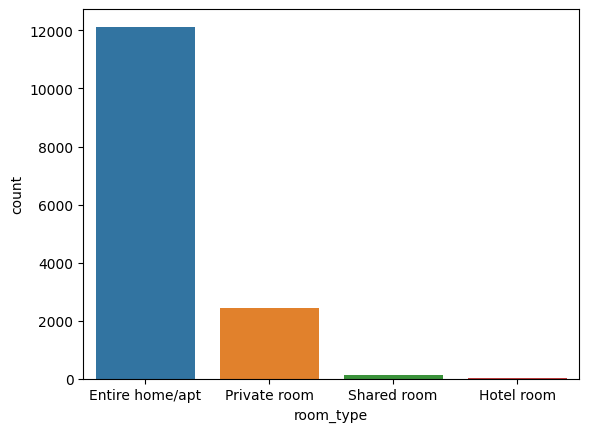

In [61]:
sns.countplot(x='room_type', data=df)

<ipython-input-54-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

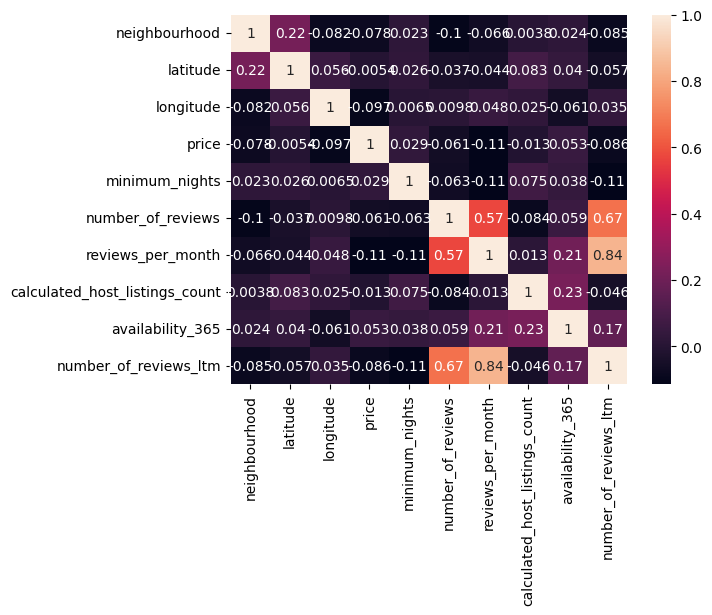

In [54]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.pairplot(df)

<Axes: >

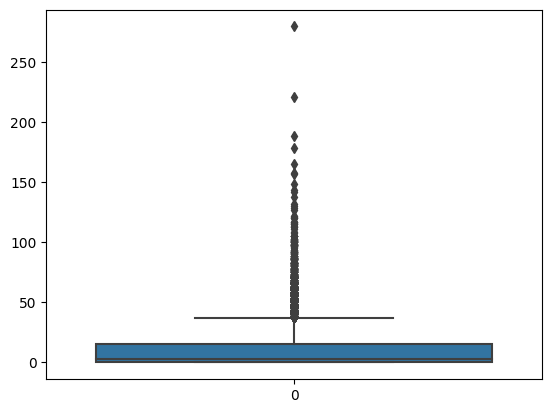

In [58]:
sns.boxplot(df['number_of_reviews_ltm'])